# Time-frequency clipping

FXDECON is useful for attenuating small amounts of random noise, but it will tend to smear noise to neighbouring traces. This means that when there is high amplitude noise confined to isolated traces, applying FXDECON could make things worse by causing other traces to also be affected by it. This is where time-frequency clipping is useful. Variants of it are also known by names such as FXDENOISE. It clips traces that have values, in the time windowed fx domain, that are larger than the median among nearby traces. In the SeisPro implementation, this clipping will scale values so that the magnitude of clipped values is equal to the median.

In [1]:
import torch
import numpy as np
from seispro import tfclip

batch_size = 1
n_traces = 64
n_times = 128
signal = torch.randn(batch_size, 1, n_times).repeat(1, n_traces, 1)
noise = torch.zeros_like(signal)
for i in range(10):
    noise[0, np.random.randint(n_traces), np.random.randint(n_times)] = torch.randn(1) * signal.std() * 10

noisy_data = signal + noise
denoised_data = tfclip(noisy_data, time_window_len=32)

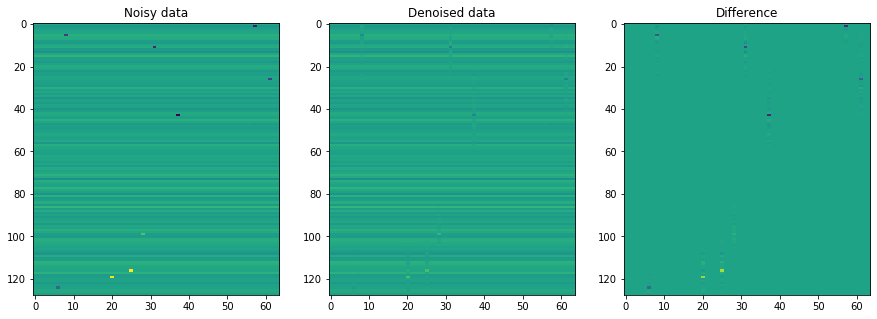

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

_, ax = plt.subplots(1,3,figsize=(15,5))
vmin, vmax = np.percentile(noisy_data.numpy(), [0, 100])
ax[0].imshow(noisy_data[0].numpy().T, aspect='auto', vmin=vmin, vmax=vmax)
ax[0].set_title('Noisy data')
ax[1].imshow(denoised_data[0].numpy().T, aspect='auto', vmin=vmin, vmax=vmax)
ax[1].set_title('Denoised data')
ax[2].imshow(noisy_data[0].numpy().T-denoised_data[0].numpy().T, aspect='auto', vmin=vmin, vmax=vmax)
ax[2].set_title('Difference');